In [33]:
import chess.engine
import chess 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import chess.pgn 
from stockfish import Stockfish
import pandas as pd
import time
import numpy as np
import json
import regex as re

## Data Cleaning

This dataset is extracted from an old online source. Due to this being an online source there may be many different circumstances that could lead to outliers.

In [34]:
path = '../data/Raw/fics_maia_cpl.ndjson'
sampled_df = pd.read_json(path, lines=True)

In [35]:
curated = []
for index, row in sampled_df.iterrows():
    curated.append({
        "name": row["White"],
        "maia_cpl": row["maia_cpl_w"],
        "stockfish_cpl": row["stock_cpl_w"],
        "elo": row["WhiteElo"],
        "moves": len(row["Moves"])
    })

    curated.append({
        "name": row["Black"],
        "maia_cpl": row["maia_cpl_b"],
        "stockfish_cpl": row["stock_cpl_b"],
        "elo": row["BlackElo"],
        "moves": len(row["Moves"])
    })

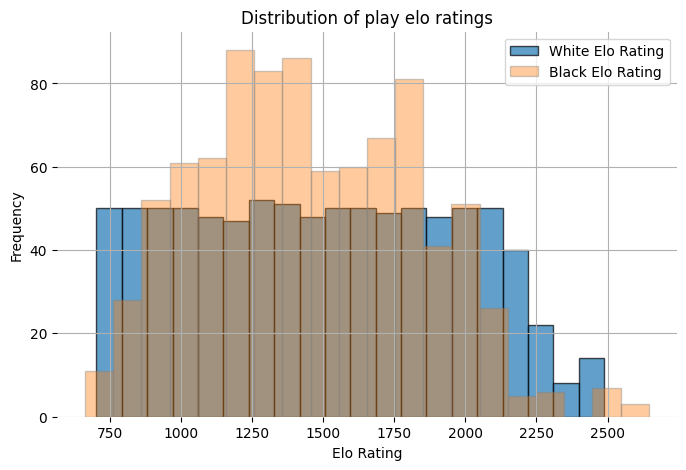

In [36]:
plt.figure(figsize=(8, 5))
plt.hist(sampled_df['WhiteElo'], bins = 20, alpha=.7, edgecolor='black', label="White Elo Rating")
plt.hist(sampled_df['BlackElo'], bins = 20, alpha=.4, edgecolor='grey', label="Black Elo Rating")

plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.title('Distribution of play elo ratings')

plt.legend()

plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('mm_maia.png', dpi=400)


plt.show()

In [37]:
small = [row for row in curated if row["stockfish_cpl"] < 0]

In [38]:
small[:2]
print(len(small))

7


In [39]:
len(curated)

1754

In [45]:
df = pd.DataFrame(curated)

# Calculate the IQR for each numerical column
Q1 = df[['stockfish_cpl', 'maia_cpl']].quantile(0.25)
Q3 = df[['stockfish_cpl', 'maia_cpl']].quantile(0.75)
IQR = Q3 - Q1


In [47]:
filtered_df = df[~((df[['stockfish_cpl', 'maia_cpl']] < (Q1 - 1.5 * IQR)) | (df[['stockfish_cpl', 'maia_cpl']] > (Q3 + 1.5 * IQR))).any(axis=1)]
curated = filtered_df.to_dict(orient='records')
len(curated)

1654

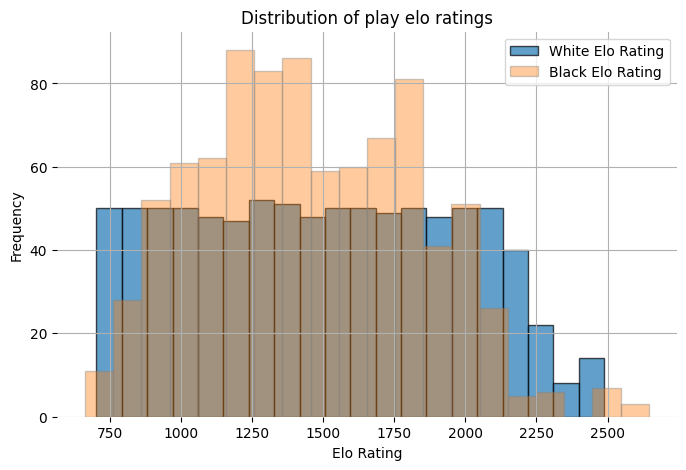

In [49]:
plt.figure(figsize=(8, 5))
plt.hist(sampled_df['WhiteElo'], bins = 20, alpha=.7, edgecolor='black', label="White Elo Rating")
plt.hist(sampled_df['BlackElo'], bins = 20, alpha=.4, edgecolor='grey', label="Black Elo Rating")

plt.xlabel('Elo Rating')
plt.ylabel('Frequency')
plt.title('Distribution of play elo ratings')

plt.legend()

plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
plt.savefig('mm_maia.png', dpi=400)


plt.show()


In [48]:
df = pd.DataFrame(curated)
df.to_csv("../data/Curated/baseline_training.csv", index=False)